<a href="https://colab.research.google.com/github/rajakandukuri89/Data-Science-Intern---Summer-2022-Remote-US-Canada-/blob/main/ShopifyDataScienceChallange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summer 2022 Data Science Intern Challenge 
**Using Google colab cloud based Tool and opted python language to analayse the Question 1**

Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b. What metric would you report for this dataset?

c. What is its value?



#Q.1a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

# Imported the below libraries to anlaysie the 100 sneaker shops

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Using the File upload option to load the data which available on csv format

In [167]:
from google.colab import files
files.upload()

Saving 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv to 2019 Winter Data Science Intern Challenge Data Set - Sheet1 (2).csv


{'2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv': b'order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at\r\n1,53,746,224,2,cash,2017-03-13 12:36:56\r\n2,92,925,90,1,cash,2017-03-03 17:38:52\r\n3,44,861,144,1,cash,2017-03-14 4:23:56\r\n4,18,935,156,1,credit_card,2017-03-26 12:43:37\r\n5,18,883,156,1,credit_card,2017-03-01 4:35:11\r\n6,58,882,138,1,credit_card,2017-03-14 15:25:01\r\n7,87,915,149,1,cash,2017-03-01 21:37:57\r\n8,22,761,292,2,cash,2017-03-08 2:05:38\r\n9,64,914,266,2,debit,2017-03-17 20:56:50\r\n10,52,788,146,1,credit_card,2017-03-30 21:08:26\r\n11,66,848,322,2,credit_card,2017-03-26 23:36:40\r\n12,40,983,322,2,debit,2017-03-12 17:58:30\r\n13,54,799,266,2,credit_card,2017-03-16 14:15:34\r\n14,100,709,111,1,cash,2017-03-22 2:39:49\r\n15,87,849,447,3,credit_card,2017-03-10 11:23:18\r\n16,42,607,704000,2000,credit_card,2017-03-07 4:00:00\r\n17,17,731,176,1,cash,2017-03-21 4:23:38\r\n18,28,752,164,1,credit_card,2017-03-21 12:09:07\r\n19,

In [168]:
df=pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

# To get a statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we use the describe method:


This method will provide various summary statistics, excluding NaN (Not a Number) values.

In [20]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


# The Amount and total Items columns are opted to evaluate AOV and to determine the metric to best suites this data

In [21]:
df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


## The naive calculation appears to be reached by averaging all of the order amount data and the standard deviation is also seems to higher side.

Also,the maximum value is 704000, which is much higher than the third quartile. So it appears that we do have some outliers contributing to the big AOV of 3145.13 that was computed erroneously.



# Now other metrics like median and mode to be calculated on the given data set Median Value as it is a central number and big and tiny outliers do not influence the median as much as the mean.

In [121]:
print('The median of the given dataset', df['order_amount'].median())
print('The mode of the given dataset', df['order_amount'].mode())

The median of the given dataset 284.0
The mode of the given dataset 0    153
dtype: int64


## As the 50% of our data falls near to the Median we can take Median as Metric to evaluate the AOV of the given sneakershops data.

# 1b. What metric would you report for this dataset?

# Ans:The figure I would report for this data is the median for order amount.

# 1c. What is its value?

# Ans:The median of the given dataset 284.0

# Further, the below steps illustrate the effects of the outliers on the AOV 

In [122]:
#df.sort_values(by=['order_amount'],ascending=False).head(10)

#df1 = df.groupby('shop_id')['order_amount'].apply(np.average)

#print(df1.describe())
print(df.nunique())

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
order_average       58
dtype: int64


## Finding the outliers
As the each shop sells only one model of shoe the average unique sale of the each shop would be the price of shoe as calculated below

In [143]:
df['order_average']=df['order_amount']/df['total_items']
df.describe()


,order_id,shop_id,user_id,order_amount,total_items,order_average
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


## **Some of the observations from the above data statistics**

# 1. The maximum order quantity is 2000 Nos
# 2. The maximum Price of the Sneaker is 25725

## **Finding the Outliers drawing scatter plots between the different columns of the data**

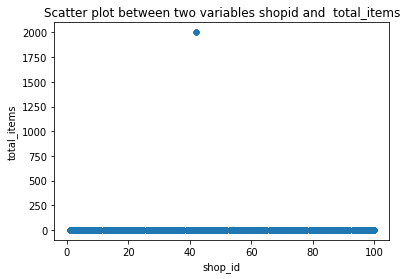

In [141]:
df.plot.scatter(x='shop_id', y='total_items', title= "Scatter plot between two variables shopid and  total_items");

plt.show(block=True);

#Outlier - 1
# It appears to be one of the shop selling the 2000 nos of sneakers which is spotted in the above plot

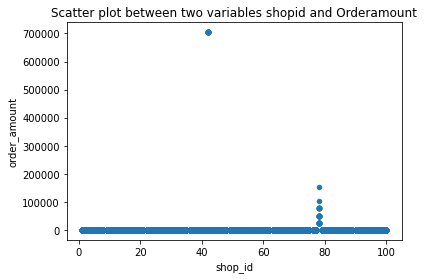

In [142]:
df.plot.scatter(x='shop_id', y='order_amount', title= "Scatter plot between two variables shopid and Order_amount");

plt.show(block=True);

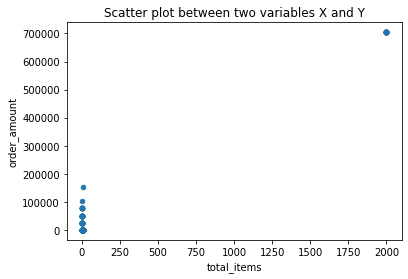

In [93]:
df.plot.scatter(x='total_items', y='order_amount', title= "Scatter plot between two variables X and Y");

plt.show(block=True);

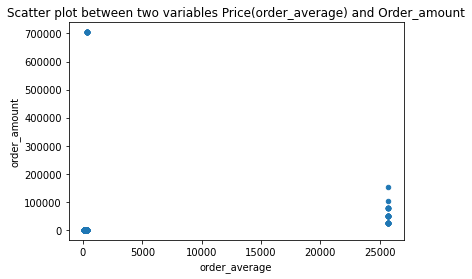

In [150]:
df.plot.scatter(x='order_average', y='order_amount', title= "Scatter plot between two variables Price(order_average) and Order_amount");

plt.show(block=True);

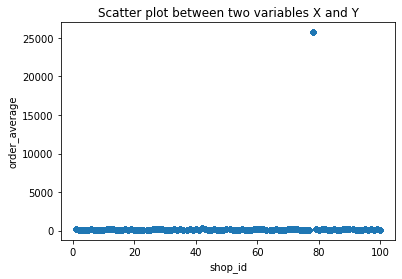

In [154]:
df.plot.scatter(x='shop_id', y='order_average', title= "Scatter plot between two variables X and Y");

plt.show(block=True); 

# Outlier 2
# It seems to be one of the shop selling sneakers at a value of 25,725 which is misleading the AOV

In [144]:
df2 = pd.DataFrame(df['order_average'].unique(), columns=['Price_shoe'])

#df2.sort_values(by='Price_shoe')


# Outliers can have a variety of reasons, and such a discussion is beyond the scope of this analysis. Instead, we'll just accept their existence and concentrate on coping with them.

# To deal with outliers, one way is to remove them from the set before computing the average.

In [165]:
df_new = df
df_new = df_new[df_new.order_average !=25725]

print('The Median and Mean of the New dataset after removing the Rate Outlier',  df_new['order_amount'].median(), df_new['order_amount'].mean())
df_new.describe()

The Median and Mean of the New dataset after removing the Rate Outlier 284.0 2717.3677836092047


,order_id,shop_id,user_id,order_amount,total_items,order_average
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


In [164]:
df_new1 = df
df_new1 = df_new1[df_new1.order_amount !=704000]

print('The Median and Mean of the New dataset after removing the Quantity Outliers',  df_new1['order_amount'].median(), df_new1["order_amount"].mean())
df_new1.describe()

The Median and Mean of the New dataset after removing the Quantity Outliers 284.0 754.0919125025085


,order_id,shop_id,user_id,order_amount,total_items,order_average
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398,387.86474
std,1443.090253,29.051718,86.800308,5314.092293,0.98318,2446.12562
min,1.000000,1.000000,700.000000,90.000000,1.00000,90.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000,133.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000,153.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000,168.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000,25725.00000


In [163]:
df_new2 = df
df_new2 = df_new2.drop(df_new2.index[df_new2.order_average.isin((25725,352))])

print('The Median and Mean of the New dataset after removing the both Outliers',  df_new2['order_amount'].median(), df_new2["order_amount"].mean())
df_new2.describe()

The Median of the New dataset after removing the both Outliers 284.0 300.1558229655313


,order_id,shop_id,user_id,order_amount,total_items,order_average
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


# On Summary, there are some other duplicate transactions with regards to the create_dt timestamp which is not in scope of this analysis. further the values of the Median and Mean of the above dataset after pullout the outliers effects as disclosed below


# 1. The Median and Mean of the New dataset after removing the Rate Outlier 284.0 **and** 2717.3677836092047

# 2. The Median and Mean of the New dataset after removing the Quantity Outliers 284.0 **and** 754.0919125025085

# 3. The Median of the New dataset after removing the both Outliers 284.0 **and** 300.1558229655313